In [2]:
from google.colab import files

uploaded = files.upload()

Saving heart.csv to heart.csv


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [4]:
data = pd.read_csv('heart.csv')

In [5]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
numeric_features = ['age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']

data1 = data.loc[:, numeric_features].copy()

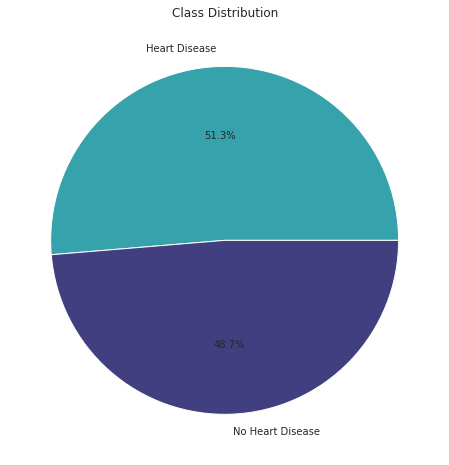

In [10]:
plt.figure(figsize=(8, 8))
plt.pie(data['target'].value_counts(), labels=["Heart Disease", "No Heart Disease"], autopct='%.1f%%', colors=['#36a2ac', '#413f80'])
plt.title("Class Distribution")
plt.show()

In [11]:
y = data['target'].copy()
X = data1

In [12]:
X

,age,sex,trestbps,chol,thalach,oldpeak,slope,ca
0,52,1,125,212,168,1.0,2,2
1,53,1,140,203,155,3.1,0,0
2,70,1,145,174,125,2.6,0,0
3,61,1,148,203,161,0.0,2,1
4,62,0,138,294,106,1.9,1,3
...,...,...,...,...,...,...,...,...
1020,59,1,140,221,164,0.0,2,0
1021,60,1,125,258,141,2.8,1,1
1022,47,1,110,275,118,1.0,1,1
1023,50,0,110,254,159,0.0,2,0


In [13]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [15]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

print("Logistic Regression Accuracy: {:.2f}%".format(lr_model.score(X_test, y_test) * 100))

Logistic Regression Accuracy: 81.95%


In [16]:
nn_model = MLPClassifier()
nn_model.fit(X_train, y_train)

print("Neural Network Accuracy: {:.2f}%".format(nn_model.score(X_test, y_test) * 100))


Neural Network Accuracy: 82.44%


In [19]:
new_value= lr_model.predict(np.array([52,1,125,212,168,1.0,2,2]).reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [20]:
new_value

array([0])